# Hackathon Hackers Website Analysis

## Load urls and names

In [54]:
entries = list()
with open('hackathon_hacker_sites.csv','r') as f:
    lines = f.read().split('\n')
    for line in lines:
        if len(line.split()) == 0:
            continue
        split = line.split(" ")
        entries.append([" ".join(split[:-1]), split[-1]])
print "{0} entries loaded.".format(len(entries))

464 entries loaded.


## Check all URLs

In [15]:
import urllib2
from IPython.display import display, clear_output

success = list()
fail = list()

for entry in entries:
    url = entry[1]
    if not url.startswith("http"):
        url = "http://" + url
    try:
        response = urllib2.urlopen(url, timeout=5)
        html = response.read()
        bootstrap = 'bootstrap' in html
        jquery = 'jquery' in html
        success.append(entry + [len(html), bootstrap, jquery])
        print len(html)
    except Exception as e:
        fail.append(entry)
    clear_output(wait=True)
    print "{0} successful, {1} failed of {2} total.".format(len(success), len(fail), len(entries))
    print str(100*float(len(success)+len(fail))/len(entries))[:4] + "% done."

360 successful, 104 failed of 464 total.
100.% done.


## Analysis

In [16]:
success_percent = 100*float(len(success))/len(entries)
fail_percent = 100*float(len(fail))/len(entries)
print "Of the HH sites: {0}% successful, {1}% failed.".format(str(success_percent)[:4], str(fail_percent)[:4])

Of the HH sites: 77.5% successful, 22.4% failed.


### Website Size
(Simple HTML length analysis)

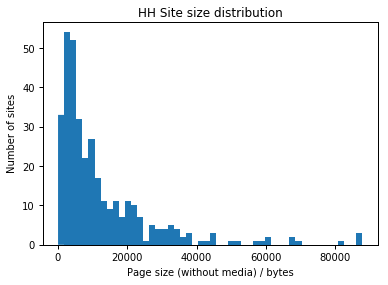

In [17]:
import numpy as np
import matplotlib.pyplot as plt

sizes = np.array([x[2] for x in success])
sizes = sizes[sizes < 100000]
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.title("HH Site size distribution")
plt.xlabel("Page size (without media) / bytes")
plt.ylabel("Number of sites")
plt.hist(sizes, bins = 50)
plt.show()

### Top Level Domains

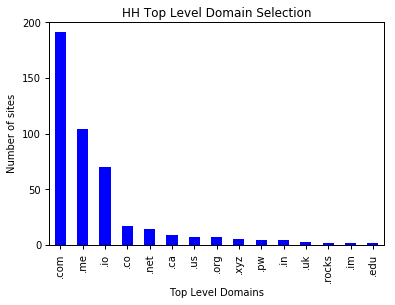

In [18]:
%matplotlib inline
import collections
import pandas as pd
# Extract URLs from entries
urls = [x[1] for x in entries]
# Take only the top level domain on
urls = ["." + x.split('.')[-1] for x in urls]
# Remove anything after & including the '/' after the TLD if it exists
urls = [x.split('/')[0] if '/' in x else x for x in urls]

vc = pd.Series(urls).value_counts()
vc = vc[vc > 1]
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.title("HH Top Level Domain Selection")
plt.xlabel('Top Level Domains')
plt.ylabel('Number of sites')
vc.plot(kind='bar')
plt.show()

In [19]:
x = next(x for x in success if x[0] == "Ben Congdon")
print x

['Ben Congdon', 'http://benjamincongdon.me/', 6988, True, True]


In [20]:
data = pd.DataFrame(success)
data.columns = ['name','url','size','bootstrap','jQuery']
print "Max size:"
print data.loc[data['size'].idxmax(),:]
print "\nMin size:"
print data.loc[data['size'].idxmin(),:]

Max size:
name                   Clayton Brand
url          http://claytonbrand.com
size                          266800
bootstrap                      False
jQuery                         False
Name: 93, dtype: object

Min size:
name                   Emily Tran
url          http://emilytran.org
size                           51
bootstrap                   False
jQuery                      False
Name: 123, dtype: object


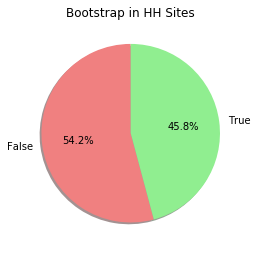

In [50]:
ax = plt.subplot(111)
data['bootstrap'].value_counts().plot(kind='pie', 
                                      shadow=True,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      explode=(0,0),
                                      colors=['lightcoral','lightgreen'])
ax.set_aspect('equal')
ax.set_title('Bootstrap in HH Sites')
ax.set_ylabel('')
plt.show()

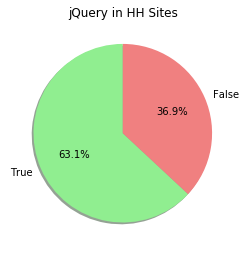

In [52]:
ax = plt.subplot(111)
data['jQuery'].value_counts().plot(kind='pie', 
                                   shadow=True,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   explode=(0,0),
                                   colors=['lightgreen','lightcoral'])
ax.set_aspect('equal')
ax.set_title('jQuery in HH Sites')
ax.set_ylabel('')
plt.show()